In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from scipy.ndimage import measurements

In [2]:
def rand_lattice(L: int=20, p: float=0.5):
    """
    It creates a random lattice (matrix of booleans) with size L by L.
    The elements are True with probability (p) and False with probability (q=1-p).
    """


    return np.random.rand(L,L) <= p


def is_percolating(L_by_L):
    """
    checks the percolation of a lattice
    """


    labeled_lattice, num_clusters = measurements.label(L_by_L)
    if np.size(np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])) == 0:
        return 0
    else:
        return 1

$\Large L \ = \ 10$

In [6]:
probabilities = np.arange(0, 1.05, step=0.05)
count_L10 = np.zeros(len(probabilities))

for j in range(len(probabilities)):
    for i in range(100):
        count_L10[j] += is_percolating(rand_lattice(L=10, p=probabilities[j]))

In [7]:
# Averaging over 100 samples:
Q = np.sum(count_L10) / 100
print(f"The probability of finding a percolating cluster: Q = {Q} %")

The probability of finding a percolating cluster: Q = 8.78 %


$\Large L \ = \ 100$

In [8]:
probabilities = np.arange(0, 1.05, step=0.05)
count_L100 = np.zeros(len(probabilities))

for j in range(len(probabilities)):
    for i in range(100):
        count_L100[j] += is_percolating(rand_lattice(L=100, p=probabilities[j]))

In [9]:
# Averaging over 100 samples:
Q = np.sum(count_L100) / 100
print(f"The probability of finding a percolating cluster: Q = {Q} %")

The probability of finding a percolating cluster: Q = 8.62 %


$\Large L \ = \ 200$

In [10]:
probabilities = np.arange(0, 1.05, step=0.05)
count_L200 = np.zeros(len(probabilities))

for j in range(len(probabilities)):
    for i in range(100):
        count_L200[j] += is_percolating(rand_lattice(L=200, p=probabilities[j]))

In [11]:
# Averaging over 100 samples:
Q = np.sum(count_L200) / 100
print(f"The probability of finding a percolating cluster: Q = {Q} %")

The probability of finding a percolating cluster: Q = 8.71 %


$\Large Plotting$

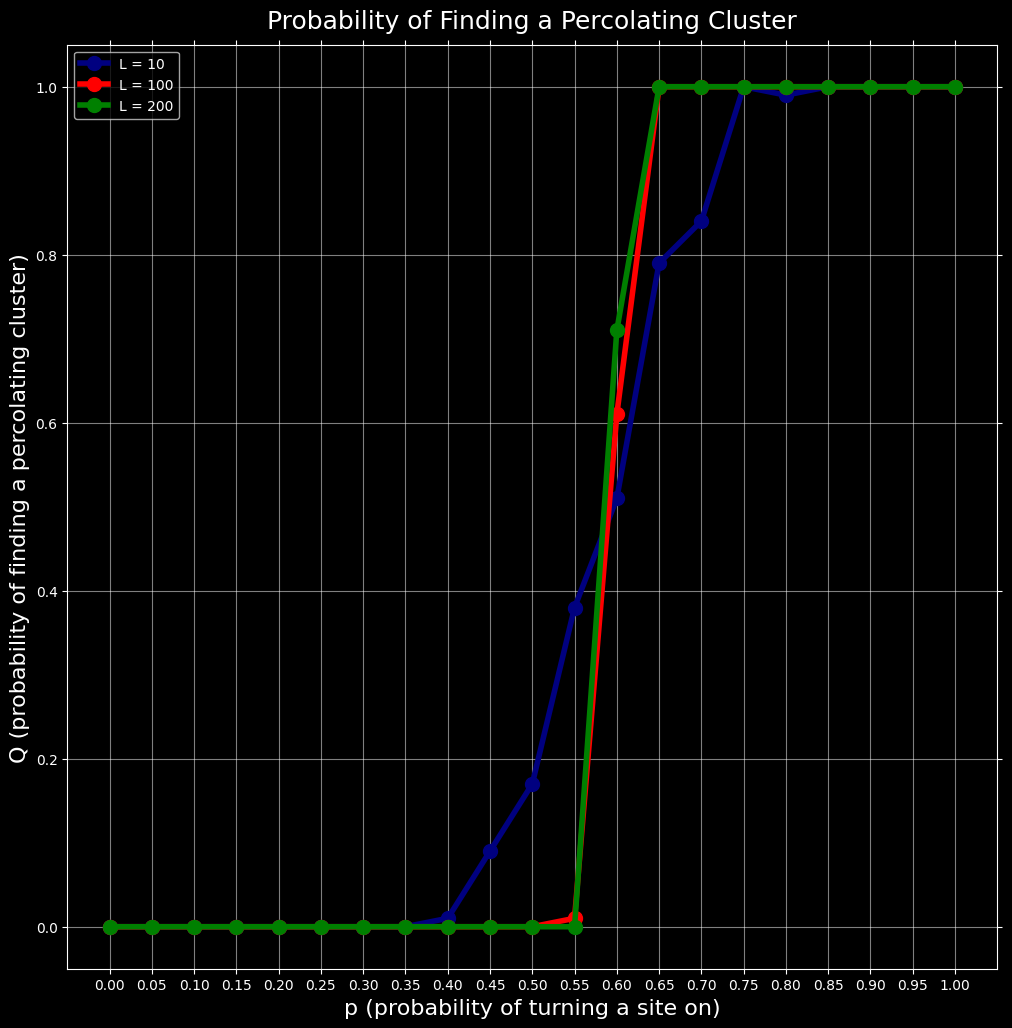

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
ax.clear()
ax.plot(probabilities, count_L10/100, label="L = 10", linewidth=4, color="navy", marker="o", ms=10)
ax.plot(probabilities, count_L100/100, label="L = 100", linewidth=4, color="r", marker="o", ms=10)
ax.plot(probabilities, count_L200/100, label="L = 200", linewidth=4, color="g", marker="o", ms=10)
ax.set_title("Probability of Finding a Percolating Cluster", fontsize=18, pad=12)
ax.set_xlabel("p (probability of turning a site on)", fontsize=16)
ax.set_ylabel("Q (probability of finding a percolating cluster)", fontsize=16)
ax.set_xticks(probabilities)
ax.grid(alpha=0.5)
ax.legend();

In [26]:
# fig.savefig("Plot4_3.jpg")